In [1]:
from google.colab import drive   
drive.mount('/content/gdrive')  # change working path of google colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/Colab Notebooks/20191119_D001Q1"
import os
os.chdir(path)
!ls   #確認path已經到local目錄

Day001_read_image_HW.ipynb		Day005_draw_HW.ipynb
Day001_read_image_Sample.ipynb		Day005_Sample.ipynb
Day002_change_color_space_HW.ipynb	Day006_affine_HW.ipynb
Day002_change_color_space_Sample.ipynb	Day006_Sample.ipynb
Day003_color_spave_op_HW.ipynb		Day007_Sample.ipynb
Day003_color_spave_op_Sample.ipynb	Day008_Sample.ipynb
Day004_geometric_transform_HW.ipynb	Day008_sobel_gaussian_blur_HW.ipynb
Day004_Sample.ipynb			Part01


# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Part01/GF_4.jpg')

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

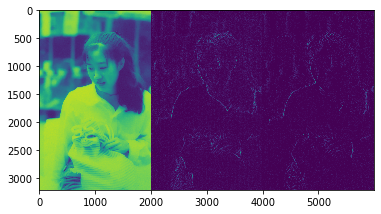

In [4]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
plt.imshow(img_show)

### 比較一次與兩次計算偏微分的結果

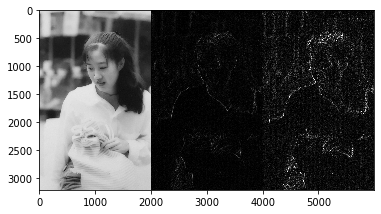

In [8]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_sobel_x, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
img_show = cv2.cvtColor(img_show, cv2.COLOR_GRAY2RGB)
plt.imshow(img_show)